In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
! ls

Cleaned_Results.ipynb
GT for HED and SRN
HED Predictions All 18K
README.md
Results_Co_Skel_ep_40_lr_1e5
Results_Co_Skel_ep_70_lr_1e4
Results_Co_Skel_ep_70_lr_1e5
Results_Co_Skel_ep_70_lr_1e7
SRN Predictions All 18K
calc_res.m
coskel_with_class_loss
coskel_with_dice_amd_weighted_loss_ep_70_new
coskel_with_dice_and_weighted_loss_ep_70
coskel_with_dice_loss_ep_70
coskel_with_dice_loss_ep_70_new
coskel_without_class_loss
eval_coskelplus.m
j_measure.m
test.png
test_coskelmodel.csv
tets_endsem_cv.m
transunet_diceloss_ep54
transunet_diceloss_ep81
transunet_diceloss_ep81.zip
transunet_vanilla_27ep
transunet_vanilla_54ep
transunet_vanilla_81ep
transunet_with_diceloss


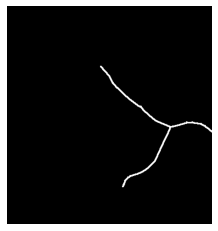

(427, 401, 3)
[  0 255]


In [3]:
# Reading Image and verifying
img_path = "./GT for HED and SRN//000000000650.png" # Change image path according to local path
img = cv2.imread(img_path)
plt.axis('off')
plt.imshow(img)
plt.show()
print(img.shape)
print(np.unique(img))

In [4]:
# # Test CSV works nicely for Co Skel as paths are consistent. For HED and SRN Models 
# # all Predictions and GT are directly dumped in to one folder respectively, so using listdir for that case

# test_csv_path = 'test_coskelmodel.csv'
# df = pd.read_csv(test_csv_path ,header=None)
# df.head()

In [5]:
# test_img_paths = df.to_numpy()
# len(test_img_paths)

In [6]:
test_img_paths =  os.listdir('./GT for HED and SRN/')
len(test_img_paths)

271

# MACRO

In [6]:
js = []
f1 = []

from tqdm import tqdm
import os
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
import cv2
from sklearn.metrics import jaccard_score

# inital_path = ""

inital_path = "Results_Co_Skel_ep_70_lr_1e4/"

# Uncomment for Co Skel Model
categ_path = "./Results_Co_Skel_ep_70_lr_1e4/gt"
categs = os.listdir(categ_path)

# Uncomment for Co Skel Model
type_img = ["preds", "gt"]


# # Uncomment for HED and SRN
# categs = [""]
# categ_path = "./GT for HED and SRN"

# # #Uncomment for HED
# # type_img = ["HED Predictions All 18K", "GT for HED and SRN"]

# #Uncomment for SRN
# type_img = ["SRN Predictions All 18K", "GT for HED and SRN"]

for categ in tqdm(categs):
# for categ in categs:
    img_list_path = f"{categ_path}/{categ}"
    img_list = os.listdir(img_list_path)
    for img_name in tqdm(img_list):
        y1 = (cv2.imread(f"./{inital_path}{type_img[0]}/{categ}/{img_name}", cv2.IMREAD_GRAYSCALE).flatten()>0).astype(np.int32)
        y2 = (cv2.imread(f"./{inital_path}{type_img[1]}/{categ}/{img_name}",cv2.IMREAD_GRAYSCALE).flatten()>0).astype(np.int32)

        iou = jaccard_score(y2, y1, average = 'macro')
        f1.append(f1_score(y2,y1, average ='macro'))
        js.append(iou)


 52%|██████████████████████████████████████████▋                                       | 26/50 [00:02<00:02,  8.38it/s]


  4%|███▎                                                                               | 2/50 [00:00<00:05,  9.11it/s]


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:04<00:02,  8.28it/s]


 12%|█████████▉                                                                         | 6/50 [00:00<00:05,  7.93it/s]


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [00:04<00:01,  8.33it/s]


 20%|████████████████▍                                                                 | 10/50 [00:01<00:04,  9.05it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [01:46<00:00,  6.64s/it]


In [7]:
import numpy as np
np.mean(js), np.mean(f1)

(0.580811580261407, 0.6548101876163785)

# Weighted

In [8]:
def jaccard_score_weighted(y_true,y_pred):
    entire_mask = y_pred + y_true
    _ , counts_elements = np.unique(entire_mask, return_counts=True)
    _ , true_counts = np.unique(y_true, return_counts=True)
    
    try:
    

        first = counts_elements[2]/(counts_elements[2]+counts_elements[1]) * true_counts[0]/(true_counts[0]+true_counts[1])
    except:
        first = 0
        
        
    y_true = 1-y_true
    y_pred = 1-y_pred


    _ , counts_elements = np.unique(entire_mask, return_counts=True)

    try:
        second = counts_elements[2]/(counts_elements[2]+counts_elements[1]) * true_counts[1]/(true_counts[0]+true_counts[1])
    except:
        second = 0
    return first + second

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

def f1_score_weighted(y_true,y_pred):
    
    _ , true_counts = np.unique(y_true, return_counts=True)
    

    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
#     print(tn, fp, fn, tp )

    recall = tp/(tp+fn) if tp>0 else 0
    precision = tp/(tp+fp) if tp>0 else 0
#     print(precision,recall)
    try:
        first = 2*(precision*recall)/(precision+recall) * true_counts[0]/(true_counts[0]+true_counts[1])

    except:
#         print(true_counts)
        first = 0
        
#     print( np.unique(y_true), np.unique(y_pred))
    y_true = 1-y_true
    y_pred = 1-y_pred
#     print( np.unique(y_true), np.unique(y_pred))
#     print(confusion_matrix(y_true,y_pred))
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
#     print(tn, fp, fn, tp )

    recall = tp/(tp+fn) if tp>0 else 0
    precision = tp/(tp+fp) if tp>0 else 0

    try:
        second = 2*(precision*recall)/(precision+recall) * true_counts[1]/(true_counts[0]+true_counts[1])
    except:
        second = 0

    return first + second

In [10]:
js_n = []
f1_s = []

from tqdm import tqdm
from sklearn.metrics import jaccard_score

# inital_path = ""

inital_path = "Results_Co_Skel_ep_70_lr_1e4/"

# Uncomment for Co Skel Model
categ_path = "./Results_Co_Skel_ep_70_lr_1e4/gt"
categs = os.listdir(categ_path)

# Uncomment for Co Skel Model
type_img = ["preds", "gt"]


# # Uncomment for HED and SRN
# categs = [""]
# categ_path = "./GT for HED and SRN"

# # #Uncomment for HED
# # type_img = ["HED Predictions All 18K", "GT for HED and SRN"]

# #Uncomment for SRN
# type_img = ["SRN Predictions All 18K", "GT for HED and SRN"]

for categ in tqdm(categs):
# for categ in categs:
    img_list_path = f"{categ_path}/{categ}"
    img_list = os.listdir(img_list_path)
    for img_name in tqdm(img_list):
        y1 = (cv2.imread(f"./{inital_path}{type_img[0]}/{categ}/{img_name}", cv2.IMREAD_GRAYSCALE).flatten()>0).astype(np.int32)
        y2 = (cv2.imread(f"./{inital_path}{type_img[1]}/{categ}/{img_name}",cv2.IMREAD_GRAYSCALE).flatten()>0).astype(np.int32)


        iou = jaccard_score_weighted(y2, y1)
        js_n.append(iou)
        
        f1_s.append(f1_score_weighted(y2,y1))

 52%|██████████████████████████████████████████▋                                       | 26/50 [00:07<00:06,  3.48it/s]


  4%|███▎                                                                               | 2/50 [00:00<00:11,  4.07it/s]


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:07<00:05,  4.00it/s]


 12%|█████████▉                                                                         | 6/50 [00:02<00:15,  2.76it/s]


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [00:09<00:05,  2.78it/s]


 20%|████████████████▍                                                                 | 10/50 [00:04<00:16,  2.36it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [03:57<00:00, 14.86s/it]


In [11]:
# np.mean(js_n), np.mean(np.nan_to_num(f1_s))
np.mean(js_n), np.mean(f1_s)

(0.20182610587066244, 0.34130823964627266)

# MICRO

In [12]:
js_mi = []
f1_mi = []

from tqdm import tqdm

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import jaccard_score

# inital_path = ""

inital_path = "Results_Co_Skel_ep_70_lr_1e4/"

# Uncomment for Co Skel Model
categ_path = "./Results_Co_Skel_ep_70_lr_1e4/gt"
categs = os.listdir(categ_path)

# Uncomment for Co Skel Model
type_img = ["preds", "gt"]


# # Uncomment for HED and SRN
# categs = [""]
# categ_path = "./GT for HED and SRN"

# # #Uncomment for HED
# # type_img = ["HED Predictions All 18K", "GT for HED and SRN"]

# #Uncomment for SRN
# type_img = ["SRN Predictions All 18K", "GT for HED and SRN"]

for categ in tqdm(categs):
# for categ in categs:
    img_list_path = f"{categ_path}/{categ}"
    img_list = os.listdir(img_list_path)
    for img_name in tqdm(img_list):
        y1 = (cv2.imread(f"./{inital_path}{type_img[0]}/{categ}/{img_name}", cv2.IMREAD_GRAYSCALE).flatten()>0).astype(np.int32)
        y2 = (cv2.imread(f"./{inital_path}{type_img[1]}/{categ}/{img_name}",cv2.IMREAD_GRAYSCALE).flatten()>0).astype(np.int32)

        iou = jaccard_score(y1, y2, average = 'micro')
        js_mi.append(iou)

        f1_mi.append(f1_score(y1,y2, average ='micro'))


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:03<00:02,  8.96it/s]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:06<00:00,  8.82it/s]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:05<00:00,  5.95it/s]


 46%|█████████████████████████████████████▋                                            | 23/50 [00:02<00:03,  8.17it/s]


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:02<00:01, 10.10it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [01:33<00:00,  5.86s/it]


In [13]:
np.mean(js_mi), np.mean(f1_mi)

(0.9236701858977838, 0.9602188359474649)

# Data Preprocessing (TransUNET Inversion of Images)

In [2]:
img_path = "./transunet_vanilla_81ep/preds/Bear/2.png"

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

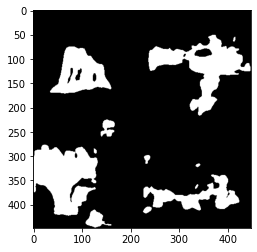

In [4]:
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

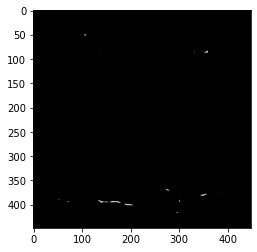

In [55]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray_r")
plt.show()

In [56]:
cmap = plt.cm.gray_r
norm = plt.Normalize(vmin=gray_img.min(), vmax=gray_img.max())

im_gs =  cmap(norm(gray_img))

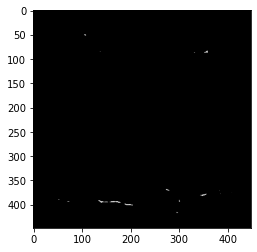

In [57]:
# i = cv2.imread("test.png")
plt.imshow(im_gs)
plt.show()

In [59]:
np.unique(im_gs*255)

array([  0.,   2.,   5.,   6.,  10.,  12.,  13.,  15.,  20.,  23.,  29.,
        33.,  39.,  40.,  42.,  43.,  45.,  48.,  49.,  54.,  56.,  60.,
        63.,  64.,  71.,  73.,  74.,  78.,  80.,  81.,  83.,  84., 101.,
       103., 106., 108., 109., 111., 115., 119., 122., 123., 141., 144.,
       145., 147., 149., 154., 157., 159., 163., 167., 168., 174., 176.,
       179., 182., 184., 188., 189., 191., 193., 197., 200., 204., 207.,
       209., 214., 215., 218., 220., 222., 223., 224., 232., 235., 238.,
       241., 245., 248., 250., 255.])

In [63]:
categs = os.listdir('./transunet_with_diceloss/save_gts/')
if not os.path.exists(f"./transunet_with_diceloss/preds/"):
    os.makedirs(f"./transunet_with_diceloss/preds/")
for i in tqdm(categs):
    imgs = os.listdir(f"./transunet_with_diceloss/save_gts/{i}/")
    if not os.path.exists(f"./transunet_with_diceloss/preds/{i}/"):
        os.makedirs(f"./transunet_with_diceloss/preds/{i}/")
    for img_name in imgs:
        img = cv2.imread(f"./transunet_with_diceloss/save_gts/{i}/{img_name}")
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cmap = plt.cm.gray_r        
        norm = plt.Normalize(vmin=gray_img.min(), vmax=gray_img.max())
        im_gs =  cmap(norm(gray_img))
        cv2.imwrite(f"./transunet_with_diceloss/preds/{i}/{img_name}", im_gs*255)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:18<00:00,  1.13s/it]


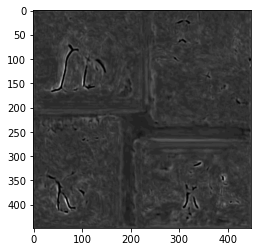

In [5]:
import cv2
import matplotlib.pyplot as plt
img_path = "./transunet_diceloss_ep81/preds/Bear/2.png"
img = cv2.imread(img_path)
plt.imshow(img/np.max(img))
plt.show()

In [9]:
import numpy as np
np.unique(img)

array([0.        , 0.05882353, 0.11764706, 0.17647059, 0.23529412,
       0.29411765, 0.35294118, 0.41176471, 0.47058824, 0.52941176,
       0.58823529, 0.64705882, 0.70588235, 0.76470588, 0.82352941,
       0.88235294, 0.94117647, 1.        ])

In [7]:
import os

In [22]:
folder_name = 'coskel_with_aug_ep46'
categs = os.listdir(f"./{folder_name}/preds")
for i in categs:
    imgs = os.listdir(f"./{folder_name}/preds/{i}")
#     print(imgs)
#     break
    for img in imgs:
        image = cv2.imread(f"./{folder_name}/preds/{i}/{img}")
#         im = cv2.bitwise_not(image)
#         im = image*255
#         plt.imshow(im)
#         plt.show()
#         max_th = np.max(image)
#         th = max_th//2
#         ret, bw_img = cv2.threshold(image,th,max_th,cv2.THRESH_BINARY)
#         new_im = np.ones(image.shape) * 255
        new_im = np.zeros(image.shape)
        new_im[np.where(image<254)] = 255
        new_im.astype(int)
#         plt.imshow(image)s
#         print(np.unique(image))
#         plt.show()
#         plt.imshow(new_im)
#         print(np.unique(image))
#         plt.show()
        
        cv2.imwrite(f"./{folder_name}/preds1/{i}/{img}", new_im)
#         break
#     break

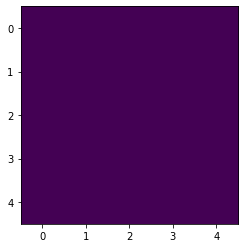

In [26]:
# categs
c = np.ones((5,5))
plt.imshow(c*0)
plt.show()

In [28]:
a = np.array([[1,2],[3,4]])
c = np.zeros((2,2))

In [16]:
b=a[a>1]

In [29]:
c[np.where(a>2)] = 255
c

array([[  0.,   0.],
       [255., 255.]])

In [ ]:
i